<a href="https://colab.research.google.com/github/omnimanwani/Sales_insight_DBMS/blob/main/Sales_insight_DBMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mysql-connector-python

In [ ]:
!pip install pandas
import pandas as pd

In [ ]:
!apt-get -y install mysql-server

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
mysql-server is already the newest version (8.0.36-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!service mysql start
!service mysql status

 * Starting MySQL database server mysqld
   ...done.
 * /usr/bin/mysqladmin  Ver 8.0.36-0ubuntu0.22.04.1 for Linux on x86_64 ((Ubuntu))
Copyright (c) 2000, 2024, Oracle and/or its affiliates.

Oracle is a registered trademark of Oracle Corporation and/or its
affiliates. Other names may be trademarks of their respective
owners.

Server version		8.0.36-0ubuntu0.22.04.1
Protocol version	10
Connection		Localhost via UNIX socket
UNIX socket		/var/run/mysqld/mysqld.sock
Uptime:			35 min 0 sec

Threads: 4  Questions: 1066  Slow queries: 0  Opens: 177  Flush tables: 3  Open tables: 88  Queries per second avg: 0.507


In [ ]:
!mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH 'mysql_native_password' BY 'root';FLUSH PRIVILEGES;"

ERROR 1045 (28000): Access denied for user 'root'@'localhost' (using password: NO)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def menu():
  c='y'
  while(c=='y' or c=='Y'):
    print("Choose the Query you want to analyze data on: ")
    print("\nGENERIC QUESTIONS: \n")
    print("1: How many unique cities does the data have?")
    print("2: In which city is each branch?")
    print("\nPRODUCT RELATED QUESTIONS: \n")
    print("3: How many unique product lines does the data have?")
    print("4: What is the most selling product line?")
    print("5: What is the total revenue by month?")
    print("6: What month had the largest COGS?")
    print("7: What product line had the largest revenue?")
    print("8: What is the city with the largest revenue?")
    print("9: What product line had the largest VAT?")
    print("10: Fetch each product line and add a column to those product lines showing 'Good', 'Bad' based on their average sales")
    print("11: Which branch sold more products than average product sold?")
    print("12: What is the most common product line by gender?")
    print("13: What is the average rating of each product line?")
    print("14: What is the most common payment method?")
    print("\nCUSTOMER RELATED QUESTIONS: \n")
    print("15: How many unique customer types does the data have?")
    print("16: How many unique payment methods does the data have?")
    print("17: What is the most common customer type?")
    print("18: Which customer type buys the most?")
    print("19: What is the gender of most of the customers?")
    print("20: What is the gender distribution per branch?")
    print("21: Which time of the day do customers give most ratings?")
    print("22: Which time of the day do customers give most ratings per branch?")
    print("23: Which day of the week has the best avg ratings?")
    print("24: Which day of the week has the best average ratings per branch?")
    print("\nSALES RELATED QUESTIONS: \n")
    print("25: Number of sales made in each time of the day per weekday")
    print("26: Which of the customer types brings the most revenue?")
    print("27: Which city has the largest tax/VAT percent?")
    print("28: Which customer type pays the most in VAT?")
    print("Enter 0 to EXIT.\n")
    choice= int(input("Enter your choice: "))
    if(choice == 1):
      run_one()
    elif(choice == 2):
      run_2()
    elif(choice == 3):
      run_3()
    elif(choice == 4):
      run_4()
    elif(choice == 5):
      run_5()
    elif(choice == 6):
      run_6()
    elif(choice == 7):
      run_7()
    elif(choice == 8):
      run_8()
    elif(choice == 9):
      run_9()
    elif(choice == 10):
      run_10()
    # elif(choice == 11):
    # elif(choice == 12):
    # elif(choice == 13):
    # elif(choice == 14):
    # elif(choice == 15):
    # elif(choice == 16):
    # elif(choice == 17):
    # elif(choice == 18):
    # elif(choice == 19):
    # elif(choice == 20):
    # elif(choice == 21):
    # elif(choice == 22):
    # elif(choice == 23):
    # elif(choice == 24):
    # elif(choice == 25):
    # elif(choice == 26):
    # elif(choice == 27):
    # elif(choice == 28):
    elif(choice == 0):
      print("Exiting...")
      break
    else:
      print("\nWrong Input, Enter again.\n")
    c=input("\nDo you want to continue?(y/n): ")


In [ ]:
import mysql.connector
mydb = mysql.connector.connect(user='root', password='root', host= 'localhost')
cursor = mydb.cursor()
cursor.execute("CREATE DATABASE IF NOT EXISTS walmartSales")
cursor.execute("USE walmartSales")
cursor.execute('''CREATE TABLE IF NOT EXISTS sales(
    invoice_id VARCHAR(30) NOT NULL PRIMARY KEY,
    branch VARCHAR(5) NOT NULL,
    city VARCHAR(30) NOT NULL,
    customer_type VARCHAR(30) NOT NULL,
    gender VARCHAR(30) NOT NULL,
    product_line VARCHAR(100) NOT NULL,
    unit_price DECIMAL(10,2) NOT NULL,
    quantity INT NOT NULL,
    tax_pct FLOAT(6,4) NOT NULL,
    total DECIMAL(12, 4) NOT NULL,
    date DATETIME NOT NULL,
    time TIME NOT NULL,
    payment VARCHAR(15) NOT NULL,
    cogs DECIMAL(10,2) NOT NULL,
    gross_margin_pct FLOAT(11,9),
    gross_income DECIMAL(12, 4),
    rating FLOAT)''')

In [ ]:
file_path = "/content/drive/MyDrive/WalmartSalesData.csv.csv"
data = pd.read_csv(file_path)
data['Rating'] = data['Rating'].astype(float)
for index, row in data.iterrows():
    cursor.execute('''INSERT INTO sales (invoice_id, branch, city, customer_type, gender, product_line, unit_price, quantity, tax_pct, total, date, time, payment, cogs, gross_margin_pct, gross_income, rating)
                      VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)''',
                      (row['Invoice ID'], row['Branch'], row['City'], row['Customer type'], row['Gender'], row['Product line'],
                      row['Unit price'], row['Quantity'], row['Tax 5%'], row['Total'], row['Date'], row['Time'],
                      row['Payment'], row['cogs'], row['gross margin percentage'], row['gross income'], row['Rating']))

In [ ]:
cursor.execute('''CREATE VIEW unique_cities_view AS
                    SELECT DISTINCT city FROM sales''')
cursor.execute('''CREATE VIEW branch_city_view AS
                    SELECT DISTINCT branch, city FROM sales''')
cursor.execute('''CREATE VIEW unique_product_lines_view AS
                    SELECT DISTINCT product_line FROM sales''')
cursor.execute('''CREATE VIEW revenue_by_month_view AS
                    SELECT MONTHNAME(date) AS month, SUM(total) AS total_revenue
                    FROM sales
                    GROUP BY month''')
cursor.execute('''CREATE VIEW month_largest_cogs_view AS
                    SELECT MONTHNAME(date) AS month, SUM(cogs) AS cogs
                    FROM sales
                    GROUP BY month
                    ORDER BY cogs DESC
                    LIMIT 1''')
cursor.execute('''CREATE VIEW product_line_largest_revenue_view AS
                    SELECT product_line, SUM(total) AS total_revenue
                    FROM sales
                    GROUP BY product_line
                    ORDER BY total_revenue DESC
                    LIMIT 1''')
cursor.execute('''CREATE VIEW city_largest_revenue_view AS
                    SELECT branch, city, SUM(total) AS total_revenue
                    FROM sales
                    GROUP BY city, branch
                    ORDER BY total_revenue DESC
                    LIMIT 1''')
cursor.execute('''CREATE VIEW product_line_largest_vat_view AS
                    SELECT product_line, AVG(tax_pct) AS avg_tax
                    FROM sales
                    GROUP BY product_line
                    ORDER BY avg_tax DESC
                    LIMIT 1''')
cursor.execute('''CREATE VIEW branches_above_avg_sales_view AS
                    SELECT branch, SUM(quantity) AS total_quantity
                    FROM sales
                    GROUP BY branch
                    HAVING total_quantity > (SELECT AVG(quantity) FROM sales)''')

In [ ]:
cursor.execute('''ALTER TABLE sales ADD CONSTRAINT unit_price_positive CHECK (unit_price > 0) ''')
cursor.execute('''ALTER TABLE sales ADD CONSTRAINT quantity_positive CHECK (quantity > 0) ''')

In [ ]:
cursor.execute('''CREATE TRIGGER calculate_gross_income BEFORE INSERT ON sales
FOR EACH ROW
BEGIN
    SET NEW.gross_income = (NEW.total - NEW.cogs);
END;
''')
cursor.execute('''CREATE TRIGGER enforce_gender_constraint BEFORE INSERT ON sales
FOR EACH ROW
BEGIN
    IF NEW.gender NOT IN ('Male', 'Female', 'Other') THEN
        SIGNAL SQLSTATE '45000' SET MESSAGE_TEXT = 'Invalid gender specified';
    END IF;
END;
''')
cursor.execute('''CREATE TRIGGER check_tax_pct_range
BEFORE INSERT ON sales
FOR EACH ROW
BEGIN
    IF NEW.tax_pct < 0 OR NEW.tax_pct > 100 THEN
        SIGNAL SQLSTATE '45000' SET MESSAGE_TEXT = 'Tax percentage must be between 0 and 100';
    END IF;
END;
''')

In [ ]:
def run_one():
  import mysql.connector
  mydb = mysql.connector.connect(user='root', password='root', host= 'localhost')
  cursor = mydb.cursor()
  cursor.execute("USE walmartSales")
  cursor.execute('SELECT COUNT(*) AS unique_cities_count FROM unique_cities_view')
  res = cursor.fetchall()
  print("Number of Cities of Sales: "+str(res[0][0]))
  sales=[]
  city=[]
  exp=[]
  cursor.execute('''SELECT COUNT(total) AS sale_per_city, city FROM sales GROUP BY city''')
  result = cursor.fetchall()

  for i in result:
    sales.append(i[0])
    city.append(i[1])
    exp.append(0.02)
  plt.pie(sales, labels=city, autopct='%1.1f%%', explode = exp)
  plt.title("Sales of Product in Cities")
  plt.show()
  mydb.commit()

In [ ]:
def run_2():
  import mysql.connector
  mydb = mysql.connector.connect(user='root', password='root', host= 'localhost')
  cursor = mydb.cursor()
  cursor.execute("USE walmartSales")
  cursor.execute('''SELECT DISTINCT branch_city_view.branch, branch_city_view.city
                    FROM branch_city_view''')
  print("Different Branches in Cities: ")
  print("Branch", "City")
  for i in cursor:
    print(i[0], i[1])
  mydb.commit()

In [ ]:
def run_3():
  import mysql.connector
  mydb = mysql.connector.connect(user='root', password='root', host= 'localhost')
  cursor = mydb.cursor()
  cursor.execute("USE walmartSales")
  cursor.execute("SELECT COUNT(*) AS unique_product_lines_count FROM unique_product_lines_view ")
  res = cursor.fetchall()
  print("Number of Unique Product Lines in Data: "+str(res[0][0]))
  mydb.commit()

In [ ]:
def run_4():
  import mysql.connector
  mydb = mysql.connector.connect(user='root', password='root', host= 'localhost')
  cursor = mydb.cursor()
  cursor.execute("USE walmartSales")
  cursor.execute('''SELECT SUM(quantity) AS total_quantity, product_line
                    FROM sales GROUP BY product_line
                    ORDER BY total_quantity DESC LIMIT 1''')
  res = cursor.fetchall()
  print("Most Selling Product line is "+ str(res[0][1]+" with sale of total Quantity "+ str(res[0][0])))
  cursor.execute('''SELECT SUM(quantity) AS total_quantity, product_line
                    FROM sales GROUP BY product_line
                    ORDER BY total_quantity DESC''')
  result=cursor.fetchall()
  qty =[]
  prod =[]
  exp=[]
  for i in result:
    qty.append(i[0])
    prod.append(i[1])
    exp.append(0.02)
  plt.pie(qty, labels=prod, autopct='%1.1f%%', explode=exp)
  plt.title("Sales of Product Lines")
  plt.show()

  mydb.commit()

In [ ]:
def run_5():
    mydb = mysql.connector.connect(user='root', password='root', host='localhost')
    cursor = mydb.cursor()
    cursor.execute("USE walmartSales")
    cursor.execute('''SELECT * FROM revenue_by_month_view''')
    res = cursor.fetchall()
    rev = []
    month = []
    print('Month Name', 'Revenue')
    for i in res:
        print(i[0]," ", i[1])
        month.append(i[0])
        rev.append(i[1])
    plt.plot(month, rev)
    plt.xlabel("Months")
    plt.ylabel("Revenue every month")
    plt.title("Total Revenue by month")
    plt.show()

    mydb.commit()

In [ ]:
def run_6():
  import mysql.connector
  mydb = mysql.connector.connect(user='root', password='root', host= 'localhost')
  cursor = mydb.cursor()
  cursor.execute("USE walmartSales")
  cursor.execute("SELECT * FROM month_largest_cogs_view ")
  res = cursor.fetchall()
  print(str(res[0][0])+" is the month with largest COGS with "+str(res[0][1])+" COGS.")
  cursor.execute('''SELECT MONTHNAME(date) AS month, SUM(cogs) AS cogs
                    FROM sales
                    GROUP BY month''')
  result = cursor.fetchall()
  cogs=[]
  month=[]
  for i in result:
    month.append(i[0])
    cogs.append(i[1])

  plt.bar(month, cogs)
  plt.xlabel("Months")
  plt.ylabel("COGS")
  plt.title("COGS per month")
  plt.show()

  mydb.commit()

In [ ]:
def run_7():
  import mysql.connector
  mydb = mysql.connector.connect(user='root', password='root', host= 'localhost')
  cursor = mydb.cursor()
  cursor.execute("USE walmartSales")
  cursor.execute("SELECT * FROM product_line_largest_revenue_view")
  res = cursor.fetchall()
  print(str(res[0][0])+" is the product line with largest revenue of "+str(res[0][1]))
  cursor.execute('''SELECT product_line, SUM(total) AS total_rev FROM sales GROUP BY product_line''')
  result = cursor.fetchall()
  pl=[]
  rev=[]
  for i in result:
    pl.append(i[0])
    rev.append(i[1])

  plt.bar(pl, rev)
  plt.xlabel("Product Lines")
  plt.ylabel("Total Revenue")
  plt.title("Revenue generated by each Product Line")
  plt.xticks(rotation=90)
  for i in range(len(pl)):
        plt.text(i, rev[i], rev[i], ha = 'center')
  plt.show()

  mydb.commit()

In [ ]:
def run_8():
  import mysql.connector
  mydb = mysql.connector.connect(user='root', password='root', host= 'localhost')
  cursor = mydb.cursor()
  cursor.execute("USE walmartSales")
  cursor.execute("SELECT * FROM city_largest_revenue_view")
  res = cursor.fetchall()
  print(str(res[0][0])+" is the branch of "+str(res[0][1])+" with largest revenue of "+str(res[0][2]))
  cursor.execute('''SELECT branch, city, SUM(total) AS total_rev FROM sales GROUP BY city, branch''')
  result = cursor.fetchall()
  city=[]
  rev=[]
  for i in result:
    city.append(i[1])
    rev.append(i[2])

  plt.bar(city, rev)
  plt.xlabel("Cities")
  plt.ylabel("Total Revenue")
  plt.title("Revenue generated by each City")
  plt.xticks(rotation=90)
  for i in range(len(city)):
        plt.text(i, rev[i], rev[i], ha = 'center')
  plt.show()

  mydb.commit()

In [ ]:
def run_9():
  import mysql.connector
  mydb = mysql.connector.connect(user = 'root', password = 'root', host = 'localhost')
  cursor = mydb.cursor()
  cursor.execute("USE walmartSales")
  cursor.execute("SELECT * FROM product_line_largest_vat_view")
  res = cursor.fetchall()
  print(str(res[0][0])+" product line has largest VAT with value " +str(res[0][1]))
  mydb.commit()

In [ ]:
def run_10():
  import mysql.connector
  mydb = mysql.connector.connect(user = 'root', password = 'root', host = 'localhost')
  cursor = mydb.cursor()
  cursor.execute("USE walmartSales")
  cursor.execute('''SELECT product_line,
    CASE
        WHEN avg_quantity > (SELECT AVG(quantity) FROM sales) THEN 'Good'
        ELSE 'Bad'
    END AS remark
FROM
    (SELECT
        product_line,
        AVG(quantity) AS avg_quantity
    FROM
        sales
    GROUP BY
        product_line) AS product_line_avg_quantity''')
  result = cursor.fetchall()
  qty =[]
  remark =[]
  exp=[]
  for i in result:
    qty.append(i[0])
    remark.append(i[1])
    exp.append(0.02)
  plt.pie(qty, labels=remark, autopct='%1.1f%%', explode=exp)
  plt.title("Average Sales of Product Lines")
  plt.show()
  for i in result:
    print(str(i[0])+" has "+str(i[1])+" average sales.")


  mydb.commit()

Choose the Query you want to analyze data on: 

GENERIC QUESTIONS: 

1: How many unique cities does the data have?
2: In which city is each branch?

PRODUCT RELATED QUESTIONS: 

3: How many unique product lines does the data have?
4: What is the most selling product line?
5: What is the total revenue by month?
6: What month had the largest COGS?
7: What product line had the largest revenue?
8: What is the city with the largest revenue?
9: What product line had the largest VAT?
10: Fetch each product line and add a column to those product lines showing 'Good', 'Bad' based on their average sales
11: Which branch sold more products than average product sold?
12: What is the most common product line by gender?
13: What is the average rating of each product line?
14: What is the most common payment method?

CUSTOMER RELATED QUESTIONS: 

15: How many unique customer types does the data have?
16: How many unique payment methods does the data have?
17: What is the most common customer type?
18

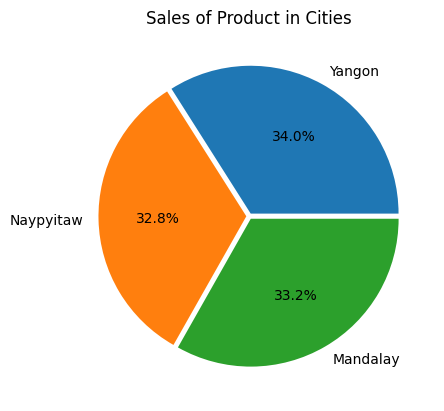

In [ ]:
menu()